<a href="https://colab.research.google.com/github/adrian-ch34/calculus-and-algebra-problems-with-python/blob/main/evaluacion_general_4Geeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title: General Evaluation 4Geeks**
**Author: Adrian Chirinos**

**Date: 31/10/2025**

 **Source:** *Cassotti et al. (2014), Prediction of Acute Aquatic Toxicity Toward Daphnia magna by using the GA-kNN Method, Alternatives to Laboratory Animals Volume 42, Issue 1, March 2014*

In [43]:
#Step 0: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression



In [13]:
#Step 1: Load Data
df_raw = pd.read_csv('/content/qsar_aquatic_toxicity.csv', sep=';', header=None)
df_raw.columns = ['TPSA','SAcc','H050','MLOGP','RDCH','GATS1p','nN','C040','LC50']
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPSA    546 non-null    float64
 1   SAcc    546 non-null    float64
 2   H050    546 non-null    int64  
 3   MLOGP   546 non-null    float64
 4   RDCH    546 non-null    float64
 5   GATS1p  546 non-null    float64
 6   nN      546 non-null    int64  
 7   C040    546 non-null    int64  
 8   LC50    546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


In [11]:
df_raw.sample(10, random_state=2025)

,TPSA,SAcc,H050,MLOGP,RDCH,GATS1p,nN,C040,LC50
240,0.00,0.000,0,6.232,2.728,0.493,0,0,7.610
57,87.66,139.995,3,1.589,3.514,1.339,2,1,3.819
143,83.67,84.184,1,0.349,2.397,2.092,1,1,5.760
493,0.00,0.000,0,3.259,1.979,1.111,0,0,4.300
48,29.10,43.156,1,3.076,2.438,0.773,1,1,4.714
400,111.87,144.177,1,1.748,2.377,0.839,2,0,4.790
424,13.14,9.507,0,3.743,2.995,0.783,0,0,4.737
381,20.23,42.683,1,2.637,2.344,0.758,0,0,4.610
482,110.45,141.047,1,2.767,3.488,1.216,2,2,4.071
475,44.45,16.786,0,1.157,1.334,0.685,1,1,5.418


In [17]:
#Step 2: Preprocessing. Si bien la data ya está procesada se trabajará con una
#copia del set original en pro de mejores pácticas de procesamiento de datos.
df= df_raw.copy()

In [27]:
#Step 3: EDA
df_train, df_test = train_test_split(df, test_size=0.1, random_state = 2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((491, 9), (55, 9))

In [28]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
TPSA,491.0,49.007821,47.892908,0.000,14.465,40.460,70.1400,347.320
SAcc,491.0,59.858112,70.315322,0.000,11.000,42.683,78.0395,571.952
H050,491.0,0.957230,1.669719,0.000,0.000,0.000,1.0000,18.000
MLOGP,491.0,2.318984,1.764460,-6.446,1.237,2.296,3.4775,9.148
RDCH,491.0,2.503827,0.819345,1.000,1.975,2.344,2.9300,6.439
GATS1p,491.0,1.043798,0.400222,0.281,0.737,1.021,1.2560,2.500
nN,491.0,0.997963,1.407703,0.000,0.000,0.000,2.0000,11.000
C040,491.0,0.358452,0.829202,0.000,0.000,0.000,0.0000,11.000
LC50,491.0,4.666684,1.661448,0.122,3.609,4.530,5.6290,10.047


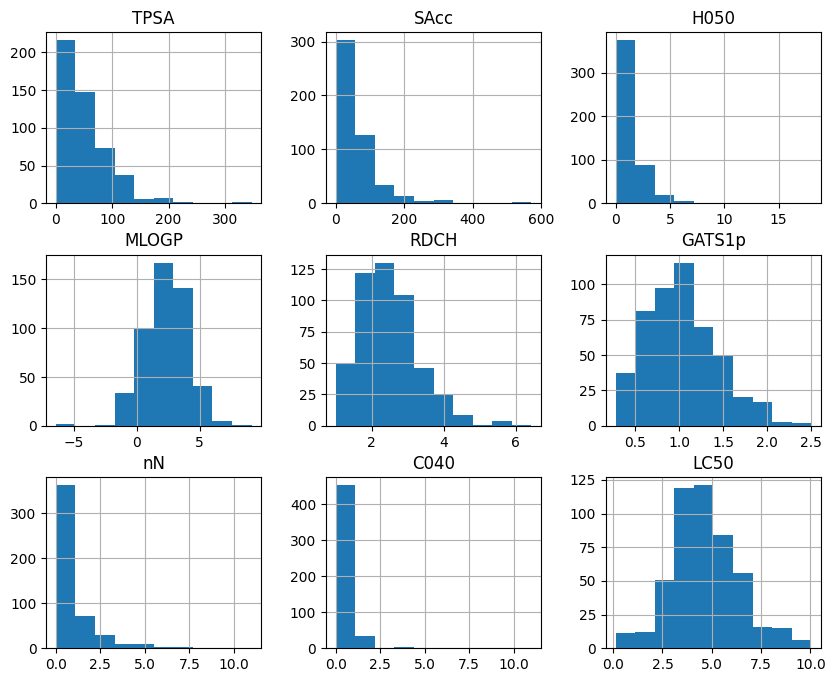

In [29]:
df_train.hist(figsize=(10, 8))
plt.show()


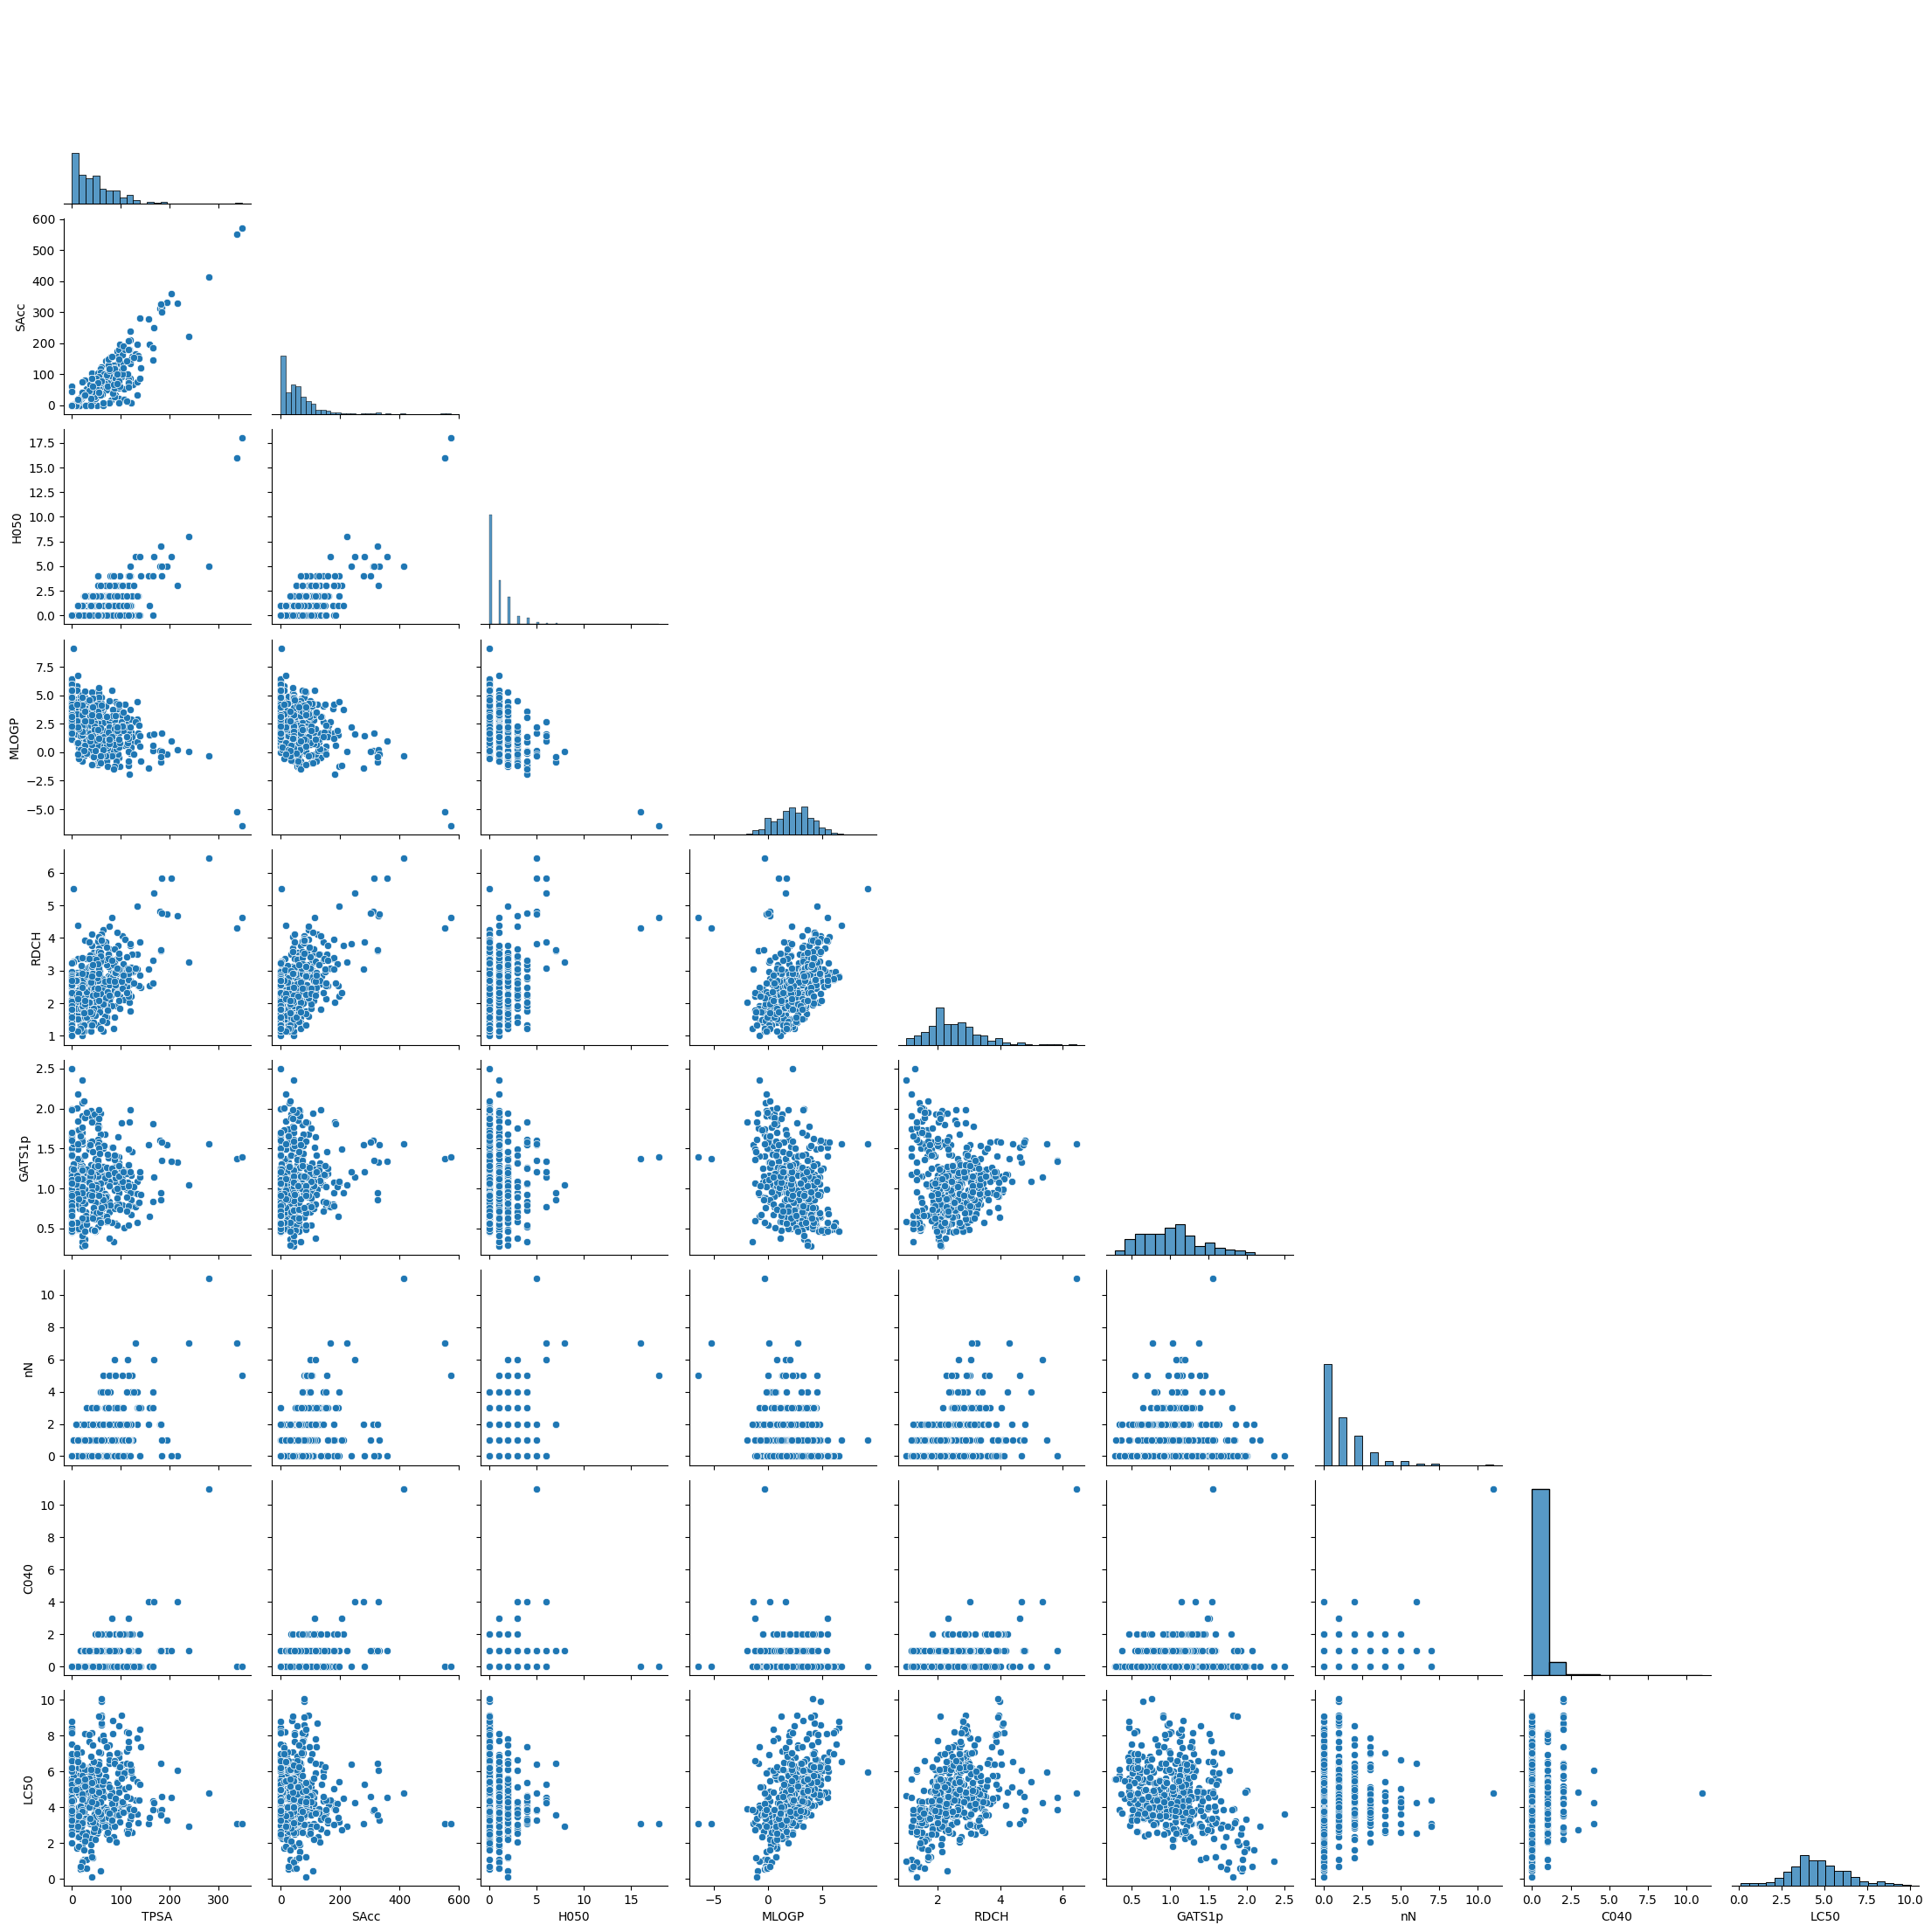

In [30]:
sns.pairplot(data=df_train, corner=True)
plt.show()

In [33]:
#Step 4: ML
X_train = df_train.drop(columns='LC50')
y_train = df_train['LC50']

X_test = df_test.drop(columns='LC50')
y_test = df_test['LC50']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((491, 8), (491,), (55, 8), (55,))

In [37]:
#PIPELINE

#Sleccionar columnas numéricas
num_cols = X_train.select_dtypes('number').columns

#Transformador numérico
num_proc = Pipeline(steps= [
    ('scaler',MinMaxScaler())
])

#Definir Preprocesador
processor = ColumnTransformer(transformers=[
    ('num', num_proc, num_cols)
])

# Definir pipeline completo
linear_r = Pipeline(steps=[
    ('preprocess', processor),
    ('model', LinearRegression())
])

In [46]:
#Entranamiento y evaluación
linear_r.fit(X_train, y_train)
y_pred = linear_r.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

R²: 0.512
RMSE: 1.185
MAE: 0.841
